Chapter 26
# 可视化二元高斯分布PDF
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
rho_array = [-0.9, -0.7, -0.5, -0.3, 0, 0.3, 0.5, 0.7, 0.9]

In [5]:
sigma_X = 1; sigma_Y = 1 # 标准差

In [10]:
mu_X = 0; mu_Y = 0    # 期望

In [16]:
width = 4
X = np.linspace(-width,width,321)
Y = np.linspace(-width,width,321)
XX, YY = np.meshgrid(X, Y)
XXYY = np.dstack((XX, YY))

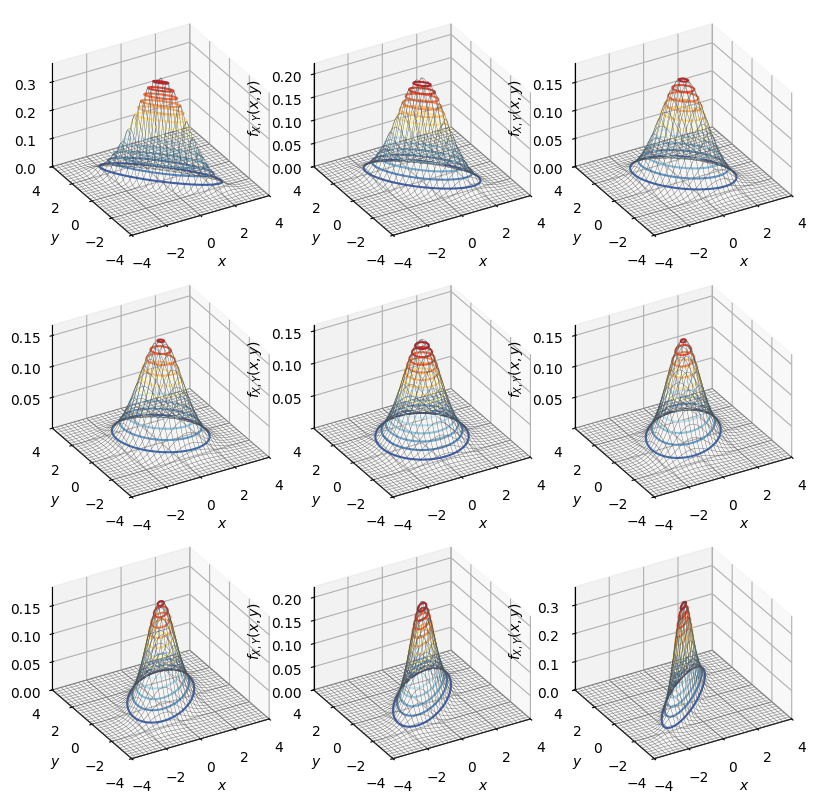

In [19]:
# 曲面
fig = plt.figure(figsize = (8,8))
for idx, rho_idx in enumerate(rho_array):
    # 质心
    mu = [mu_X, mu_Y]
    # 协方差
    Sigma = [[sigma_X**2, sigma_X*sigma_Y*rho_idx], [sigma_X*sigma_Y*rho_idx, sigma_Y**2]]
    # 二元高斯分布
    bi_norm = multivariate_normal(mu, Sigma)
    f_X_Y_joint = bi_norm.pdf(XXYY)
    
    ax = fig.add_subplot(3, 3, idx+1, projection='3d')
    ax.plot_wireframe(XX, YY, f_X_Y_joint, rstride=10, cstride=10, color=[0.3,0.3,0.3], linewidth=0.25)

    ax.contour(XX,YY, f_X_Y_joint,15, cmap = 'RdYlBu_r')

    ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$f_{X,Y}(x,y)$')
    ax.view_init(azim=-120, elev=30)
    ax.set_proj_type('ortho')

    ax.set_xlim(-width, width); ax.set_ylim(-width, width); ax.set_zlim(f_X_Y_joint.min(),f_X_Y_joint.max())
    # ax.axis('off')
    
plt.tight_layout()
fig.savefig('二元高斯分布，曲面.svg', format='svg')
plt.show()

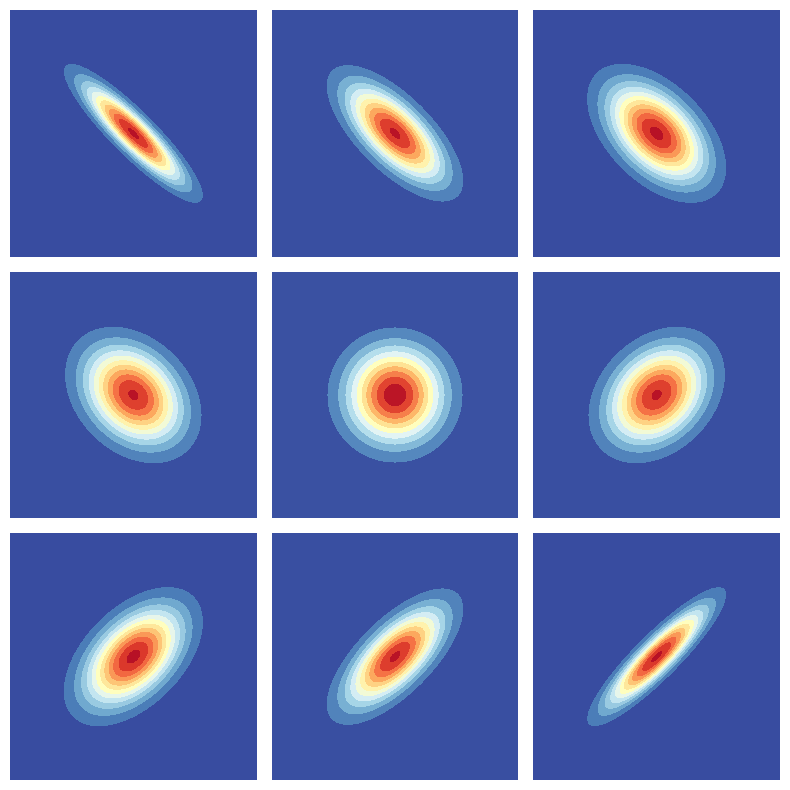

In [26]:
# 平面填充等高线
fig = plt.figure(figsize = (8,8))
for idx, rho_idx in enumerate(rho_array):
    mu = [mu_X, mu_Y]
    Sigma = [[sigma_X**2, sigma_X*sigma_Y*rho_idx], [sigma_X*sigma_Y*rho_idx, sigma_Y**2]]
    bi_norm = multivariate_normal(mu, Sigma)
    f_X_Y_joint = bi_norm.pdf(XXYY)
    ax = fig.add_subplot(3, 3, idx+1)
    ax.contourf(XX, YY, f_X_Y_joint, levels = 12, cmap='RdYlBu_r')
    ax.set_xlabel('$x$'); ax.set_ylabel('$y$')
    ax.set_xlim(-width, width); ax.set_ylim(-width, width)
    ax.axis('off')

plt.tight_layout()
fig.savefig('二元高斯分布， 等高线.svg', format='svg')
plt.show()